In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.v2 as v2

In [2]:
height=242
width=242
# Normalisation
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(), # Converts regular images into tensors from 0-255 to 0.0-1.0.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalises the images via standardisation  
    ]) 

# Random Perspective
transform_RP = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Random Rotation
transform_RR = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Grayscale
transform_grayscale = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32 # process 4 images at once

# Dataset 
root = r"C:\Users\Work\Documents\GitHub\PneumoNet\data\pneumonia"
dataset = torchvision.datasets.ImageFolder(root=root, transform=transform)

# Splitting the dataset 
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
trainset, testset = torch.utils.data.random_split(dataset, [train_size, test_size])

Data augmentation to artificially increase dataset to introduce variability.

* brightness/contrast (1) 
* Rotation (2) 
* Noise (3) 

In [3]:
# Data augmentation for the training set (creating the datasets for each transform)
trainset_RP = torchvision.datasets.ImageFolder(root=root, transform=transform_RP)
trainset_RR = torchvision.datasets.ImageFolder(root=root, transform=transform_RR)
trainset_gray = torchvision.datasets.ImageFolder(root=root, transform=transform_grayscale)

# Concatenate datasets
trainset_all = torch.utils.data.ConcatDataset([trainset_RR, trainset_RR, trainset_gray])

print(f"Original dataset size: {len(trainset)}")
print(f"Dataset size with augmentation: {len(trainset_all)}")

Original dataset size: 4672
Dataset size with augmentation: 17520


In [4]:
# Dataloader for the trainset and the testset
trainloader = torch.utils.data.DataLoader(trainset_all, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)
# classes
classes = ('NORMAL', 'PNEUMONIA')


In [5]:
# Displaying random images from trainset and testset

import matplotlib.pyplot as plt
import numpy as np
import random

images = []
labels = []

def imgprev(trainset, num_images=5):
    randind = random.sample(range(len(trainset)), num_images)
    for i in randind:
        img, label = trainset[i] # unpack image and label
        img = img / 2 + 0.5 # unnormalise the images
        npimg = img.numpy() # Converts tensors into NumPy array which matplotlib can use.

        # Append each image iteration or label to images or labels
        images.append(img)
        labels.append(label)

imgprev(trainset)

"""
grid = torchvision.utils.make_grid(images,nrow=5)
plt.figure(figsize=(18, 5))
plt.imshow(np.transpose(grid, (1, 2, 0))) 
"""

'\ngrid = torchvision.utils.make_grid(images,nrow=5)\nplt.figure(figsize=(18, 5))\nplt.imshow(np.transpose(grid, (1, 2, 0))) \n'

In [6]:
# random perspective transformation visualisation
# first 5 images

for i in range(5):
    img, label = trainset[i]
    perspective_imgs = [trainset_RP[i][0] for _ in range(4)]
    all_imgs = [img] + perspective_imgs

    # Make a grid
    grid = torchvision.utils.make_grid(all_imgs, nrow=5)
    grid = grid / 2 + 0.5  # unnormalize if your images were normalized
    npgrid = grid.numpy()

    """
    # Plot
    plt.figure(figsize=(10, 3))
    plt.imshow(np.transpose(npgrid, (1, 2, 0)))
    plt.axis('off')
    plt.title(f"Original Label: {trainset.dataset.classes[label]}")
    plt.show()
    """

In [7]:
# random rotation visualisation
# first 5 images

for i in range(5):
    img, label = trainset[i]
    rotated_imgs = [trainset_RR[i][0] for _ in range(4)]
    all_imgs = [img] + rotated_imgs

    # Make a grid
    grid = torchvision.utils.make_grid(all_imgs, nrow=5)
    grid = grid / 2 + 0.5  # unnormalize if your images were normalized
    npgrid = grid.numpy()

    """
    # Plot
    plt.figure(figsize=(10, 3))
    plt.imshow(np.transpose(npgrid, (1, 2, 0)))
    plt.axis('off')
    plt.title(f"Original Label: {trainset.dataset.classes[label]}")
    plt.show()

# Note to self: How do I make it not clip?
    """

In [8]:
# grayscale
# first 5 images
for i in range(5):
    orig_img, label = trainset[i]
    gray_img = v2.Grayscale(num_output_channels=3)(orig_img)
    all_imgs = [orig_img, gray_img]

    # Make a grid
    grid = torchvision.utils.make_grid(all_imgs, nrow=2)
    grid = grid / 2 + 0.5  # unnormalise if your images were normalised
    npgrid = grid.numpy()

    """
    # Plot
    plt.figure(figsize=(10, 3))
    plt.imshow(np.transpose(npgrid, (1, 2, 0)))
    plt.axis('off')
    plt.title(f"Original Label: {trainset.dataset.classes[label]}")
    plt.show()
    """

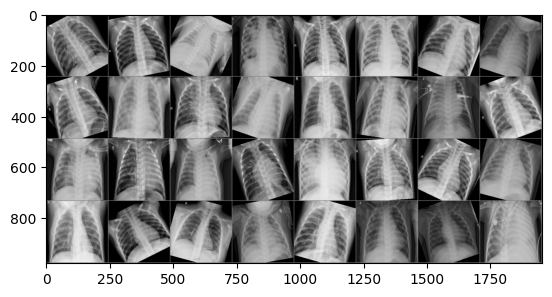

PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA NORMAL PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA NORMAL PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA
Batch shape: torch.Size([32, 3, 242, 242])
Single image shape: torch.Size([3, 242, 242])


In [9]:
# Show training images
import matplotlib.pyplot as plt
import numpy as np
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalise
    npimg = img.numpy() # Converts tensors into NumPy array which matplotlib can use.
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print(f"Batch shape: {images.shape}")
print(f"Single image shape: {images[0].shape}")

In [10]:
# Define a Convolutional Neural Network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__() # line of code is used to initialise the nn.Module since the class inherits from nn.Module
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # input channels, number of output feature maps, kernel size
        self.pool = nn.MaxPool2d(2, 2) # looks at n x n block and takes maximum value from each block
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) 
        self.fc1 = nn.Linear(64 * 60 * 60, 512) # flatten inputs from n -> 120 outputs
        self.fc2 = nn.Linear(512, 128) # shinks n inputs -> n outputs
        self.fc3 = nn.Linear(128, 2) # further shrinks n inputs -> n outputs

        """
        * Kernel or filter is a small matrix that slides over the input image. At each position, it does the dot product.
        * That single number becomes a pixel in the feature map.
        * Feature maps can be large, they are then made smaller via pooling. Pooling looks at small windows in the feature map
        and summarises them by taking the largest value.
        """

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

        """
        Convo -> ReLU -> Pooling
        Flatten (feature maps are turned into a 1D vector - unrolling all features into a list of numbers)
        Linear -> ReLU
        Linear -> ReLU
        Linear (output layer)
        """

net = Net()

In [11]:
# Define a loss function and optimiser
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [12]:
# Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print (device) # CUDA = 0

net.to(device) # Send CNN to CUDA

cuda:0


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=230400, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

In [14]:
import time
start_time = time.time()
# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data ## This line runs without CUDA
        inputs, labels = data[0].to(device), data[1].to(device) # Send input & labels to CUDA
        
        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # Make predictions
        loss = criterion(outputs, labels) # Compare predictions to the truth
        loss.backward() # Figure out how to change the network to be less wrong
        optimiser.step() # Update the network's weights 

        # print statistics
        running_loss += loss.item()
        if i % 15 == 14:    # print every 15 batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}') # Divide total mistake by 50 -> get average mistakes per batch
            running_loss = 0.0 # Reset the loss

end_time = time.time()
training_duration = end_time - start_time
minutes, seconds = divmod(training_duration, 60)
hours, minutes = divmod(minutes, 60)
format = f"{int(hours)}h {int(minutes)}m {int(seconds)}s"

print(f'Finished Training, time taken: {format}')

# Large dataset + low epochs -> less overfitting
# small dataset + high epochs -> more overfitting

[1,    15] loss: 0.094
[1,    30] loss: 0.113
[1,    45] loss: 0.110
[1,    60] loss: 0.109
[1,    75] loss: 0.094
[1,    90] loss: 0.106
[1,   105] loss: 0.102
[1,   120] loss: 0.095
[1,   135] loss: 0.096
[1,   150] loss: 0.109
[1,   165] loss: 0.094
[1,   180] loss: 0.112
[1,   195] loss: 0.112
[1,   210] loss: 0.093
[1,   225] loss: 0.097
[1,   240] loss: 0.097
[1,   255] loss: 0.089
[1,   270] loss: 0.092
[1,   285] loss: 0.111
[1,   300] loss: 0.107
[1,   315] loss: 0.097
[1,   330] loss: 0.102
[1,   345] loss: 0.104
[1,   360] loss: 0.096
[1,   375] loss: 0.096
[1,   390] loss: 0.094
[1,   405] loss: 0.107
[1,   420] loss: 0.110
[1,   435] loss: 0.094
[1,   450] loss: 0.102
[1,   465] loss: 0.082
[1,   480] loss: 0.104
[1,   495] loss: 0.084
[1,   510] loss: 0.085
[1,   525] loss: 0.105
[1,   540] loss: 0.096
[2,    15] loss: 0.092
[2,    30] loss: 0.094
[2,    45] loss: 0.106
[2,    60] loss: 0.110
[2,    75] loss: 0.099
[2,    90] loss: 0.093
[2,   105] loss: 0.098
[2,   120] 

In [15]:
# Saving the model
PATH = './PneumoNet.pth'
torch.save(net.state_dict(), PATH)


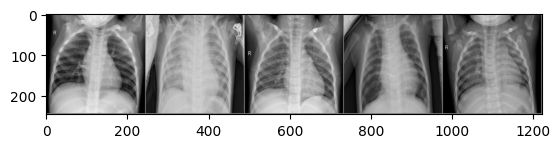

GroundTruth:  PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA


In [16]:
# Testing the network on the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# show the first 5 images
show_images = images[:5]
show_labels = labels[:5]

# print images
imshow(torchvision.utils.make_grid(show_images))
print('GroundTruth: ', ' '.join(f'{classes[show_labels[j]]:5s}' for j in range(5)))

# Grab a batch
# Feed the images to the network
# Display the images
# Show the ground truth labels 

In [17]:
# Load back in our saved model
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [18]:
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))

Predicted:  PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA PNEUMONIA


In [20]:
# Seeing how the network performs on the whole dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 89 %


In [21]:
# What is the accuracy for the different classes?

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: NORMAL is 0.0 %
Accuracy for class: PNEUMONIA is 100.0 %


Model is overfitting given the accuracy rate.